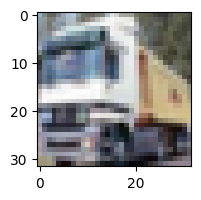

(50000, 32, 32, 3)

In [54]:
import tensorflow as tf
from tensorflow import keras

(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

x_train.shape

x_test.shape

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])
plt.show()

import numpy as np
np.unique(y_test)


y_test[1]


# perform normalization
x_train=x_train/255
x_test=x_test/255


x_train.shape



# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())




In [55]:
from sklearn.metrics import classification_report


In [56]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [57]:
import numpy as np
y_predd=np.argmax(y_pred[1])

In [58]:
y_predd

9

In [59]:
y_test.shape

(10000, 1)

In [60]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [61]:
y_test=y_test.reshape(-1,)

In [62]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [63]:

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(4000,  activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2579 - loss: 2.2107
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3767 - loss: 1.7183
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4165 - loss: 1.6195
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4334 - loss: 1.5649
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4519 - loss: 1.5152


In [64]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [65]:
# classification_report(y_predd,y_test)

In [66]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [67]:
np.argmax(model.predict(x_test)) # here it gives the index of the maximum value in the entire test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


17131

In [68]:
y_pp=np.argmax(model.predict(x_test),axis=1) # here it check all the rows

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [69]:
print(classification_report(y_pp,y_test))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51       941
           1       0.68      0.53      0.59      1275
           2       0.21      0.34      0.26       636
           3       0.57      0.23      0.33      2514
           4       0.15      0.45      0.23       335
           5       0.31      0.38      0.34       815
           6       0.54      0.43      0.48      1259
           7       0.32      0.63      0.42       500
           8       0.55      0.57      0.56       961
           9       0.40      0.52      0.45       764

    accuracy                           0.42     10000
   macro avg       0.42      0.46      0.42     10000
weighted avg       0.49      0.42      0.43     10000



now lets try by using the cnn

In [70]:
# for that we need to create an  cnn model
cnn=keras.Sequential([
    # first me need to perform convolution
    keras.layers.Conv2D(filters=34,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [72]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3316 - loss: 1.8227
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5326 - loss: 1.3059
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5784 - loss: 1.1966
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6009 - loss: 1.1388
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6252 - loss: 1.0631


In [73]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5993 - loss: 1.1167


[1.141214370727539, 0.593500018119812]

In [74]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [75]:
cnn.predict(x_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[0.07290822, 0.03733493, 0.9271535 , ..., 0.6412637 , 0.07465306,
        0.1141392 ],
       [0.928829  , 0.99186105, 0.92834705, ..., 0.968013  , 0.85109735,
        0.9998243 ],
       [0.76538885, 0.8230628 , 0.85354555, ..., 0.687913  , 0.9557711 ,
        0.9982002 ],
       ...,
       [0.9676114 , 0.9689992 , 0.844929  , ..., 0.37721255, 0.9887222 ,
        0.9996017 ],
       [0.98576117, 0.9994202 , 0.4600597 , ..., 0.05518324, 0.9984863 ,
        0.9989472 ],
       [0.9869397 , 0.8290129 , 0.7892495 , ..., 0.9176465 , 0.8074781 ,
        0.9014508 ]], dtype=float32)

In [76]:
y_pre=np.argmax(cnn.predict(x_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [77]:
y_pre

array([3, 8, 0, ..., 2, 1, 7])

In [78]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1046
           1       0.64      0.80      0.71       798
           2       0.63      0.36      0.46      1780
           3       0.33      0.48      0.40       690
           4       0.38      0.59      0.46       650
           5       0.45      0.58      0.51       778
           6       0.66      0.71      0.68       928
           7       0.68      0.69      0.68       981
           8       0.73      0.72      0.73      1019
           9       0.78      0.59      0.67      1330

    accuracy                           0.59     10000
   macro avg       0.59      0.61      0.59     10000
weighted avg       0.62      0.59      0.59     10000



from the above we came to know that when compare to the ann the cnn is perform better and more accurate and also it takes less computation time